In [297]:
import warnings
warnings.filterwarnings('ignore')

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
# df = pd.read_csv('/content/ushape.csv', header=None)

In [301]:
df = pd.read_csv('/content/drive/MyDrive/day58-Logistic-regression/ushape.csv', header=None)

In [302]:
df.columns = ['X', 'Y', 'class']

In [303]:
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [304]:
df.isnull().sum()

,0
X,0
Y,0
class,0


In [305]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [306]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


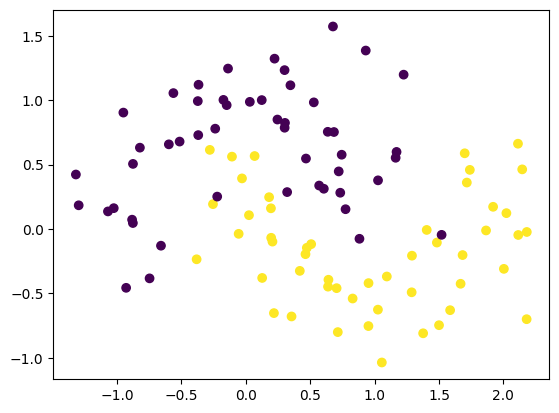

In [307]:
plt.scatter(X[:,0],X[:,1],c=y)

### Applying Logistic Regression

In [308]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [309]:
clf.fit(X, y)

LogisticRegression()

<Axes: >

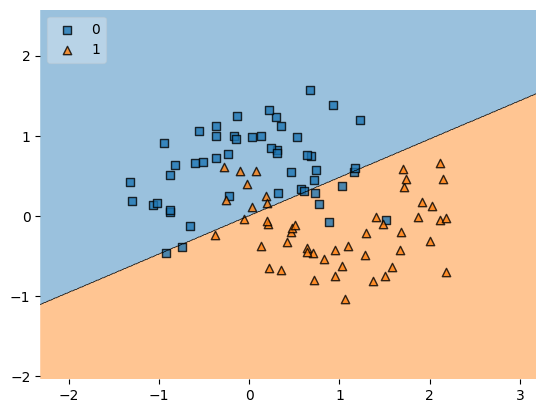

In [310]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [311]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

### Applying Polynomial Logistic Regression

In [312]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
X_trf = poly.fit_transform(X)

In [313]:
X_trf.shape

(100, 14)

In [314]:
clf2 = LogisticRegression()
np.mean(cross_val_score(clf2,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9)

In [315]:
def plot_decision_boundary(X,y,degree=1):

  poly = PolynomialFeatures(degree=degree)
  X_trf = poly.fit_transform(X)

  clf = LogisticRegression()
  clf.fit(X_trf,y)

  accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

  a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
  b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


  XX,YY=np.meshgrid(a,b)

  input_array=np.array([XX.ravel(),YY.ravel()]).T

  labels=clf.predict(poly.transform(input_array))

  plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
  plt.scatter(X[:,0],X[:,1], c=y)
  plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))


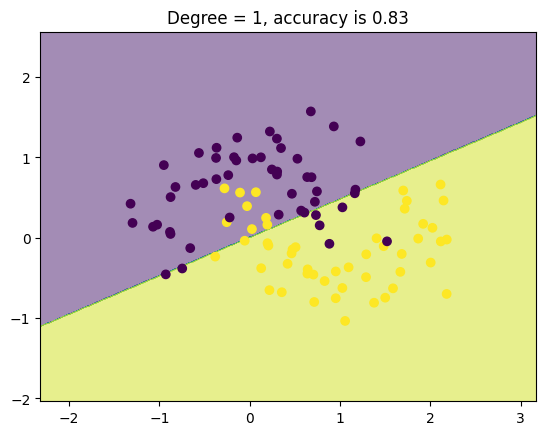

In [316]:
# when degree=2
plot_decision_boundary(X,y)

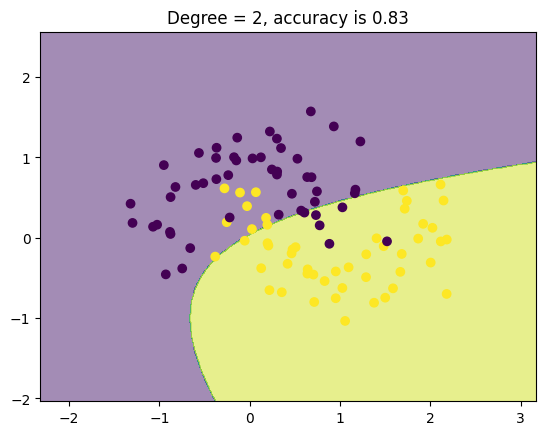

In [317]:
# when degree=2
plot_decision_boundary(X,y,degree=2)

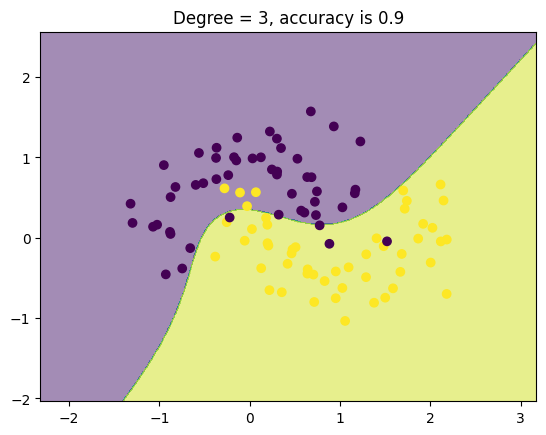

In [318]:
# when degree=3
plot_decision_boundary(X,y,degree=3)

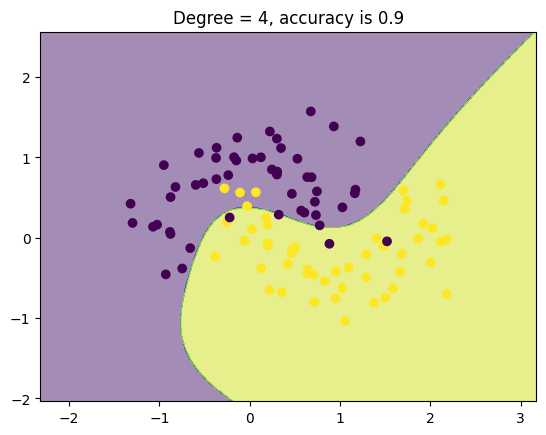

In [319]:
# when degree=4
plot_decision_boundary(X,y,degree=4)

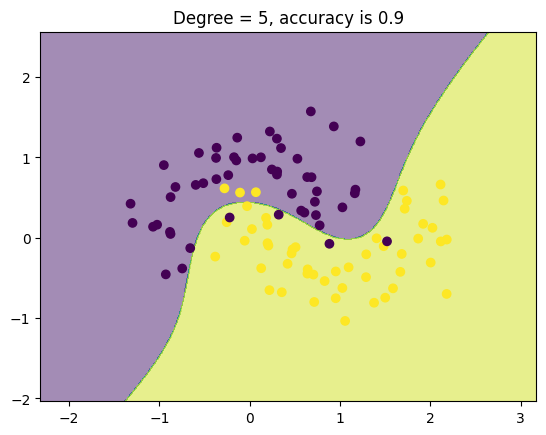

In [320]:
# when degree=5
plot_decision_boundary(X,y,degree=5)

'At degree=25 it starts overfitting the data'

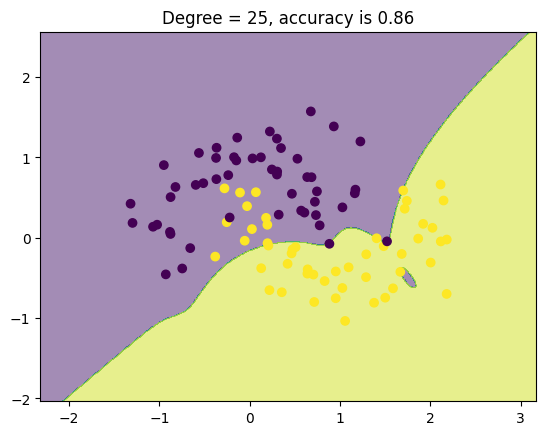

In [321]:
# when degree=25
plot_decision_boundary(X,y,degree=25)

"""At degree=25 it starts overfitting the data"""